5. Consider the 128- dimensional feature vectors given in the “face feature vectors.csv” file.

Dataset Specifications:

Total number of samples = 800

Number of classes = 2 ( labeled as “male” and “female”)

Samples from “1 to 400” belongs to class “male”

Samples from “401 to 800” belongs to class “female”

Number of samples per class = 400

Use the following information to design classifier:

Number of test samples ( last 5 in each class) = 5

Number of training samples ( remaining 395 in each class) = 395

Number of dimensions = 128


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

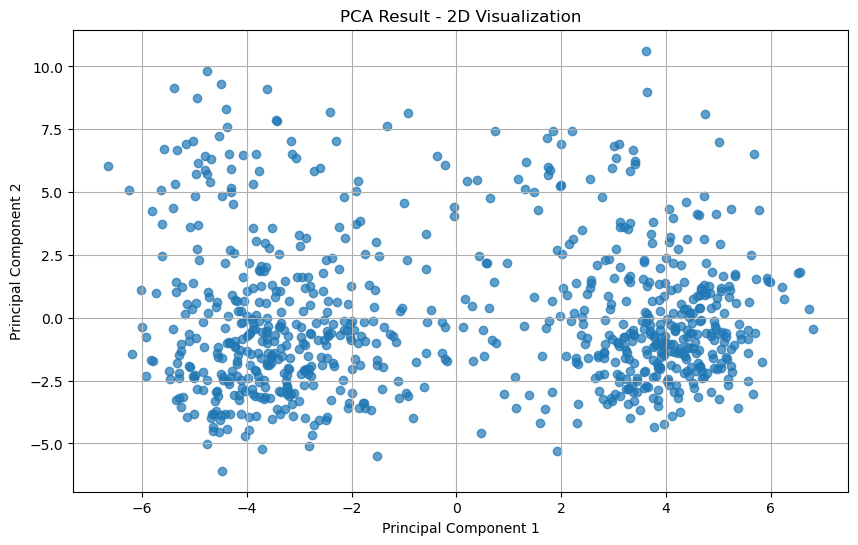

In [26]:

face_df = pd.read_csv('./face_feature_vectors.csv')

# Step 2: Preprocess the data
features = face_df.iloc[:, 2:]  # Select only numeric columns for PCA
features = features.dropna() 

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_features)
face_df = pd.DataFrame(pca_result)
# Step 5: Visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [27]:


#Function to check whether the data falls under case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True


#If the data falls under case-1 discriminant function is computed accordingly.
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    cov = cov_mat[0][0]
    weight = u1 / cov
    bias = np.log(pw) - 0.5 * np.dot(u1.T, u1) / (cov ** 2)
    return weight, bias

#If the data falls under case-2 discriminant function is computed accordingly.
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight = inv_cov @ u1
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1
    return weight, bias

#If the data falls under case-3 discriminant function is computed accordingly.
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)
    inv_cov = np.linalg.inv(cov_mat)
    weight1 = -0.5 * inv_cov
    weight2 = inv_cov @ u1
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1
    return weight1, weight2, bias


#wieghts and biases are extracted from above functions by checking the cases for the given data.
def bayes_classifier(w1, w2, pw1, pw2):
    w1_cov = np.cov(w1, rowvar=False)
    w2_cov = np.cov(w2, rowvar=False)
    
    if np.allclose(w1_cov, w2_cov):
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)
        return lambda x: np.dot(weight1 - weight2, x) + (bias1 - bias2)
    elif isCase1(w1_cov) and isCase1(w2_cov):
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)
        return lambda x: np.dot(weight1 - weight2, x) + (bias1 - bias2)
    else:
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)
        return lambda x: x.T @ (weight1_1 - weight2_1) @ x + np.dot(weight1_2 - weight2_2, x) + (bias1 - bias2)






In [28]:
#2 classes
n = 2

#No of features
features = 128

#as first 400 are male and next 400 are female
labels = np.array([0] * 400 + [1] * 400)

#Testing dataset
test_male_df = face_df.iloc[395 : 400].values
test_female_df = face_df.iloc[795 : 800].values

#test_male_df = test_male_df.drop(columns = ['Unnamed: 1', 'Unnamed: 0'])
#test_female_df = test_female_df.drop(columns = ['Unnamed: 1', 'Unnamed: 0'])

test_male_labels = labels[395 : 400] 
test_female_labels = labels[795 : 800]

#Training dataset
training_male_df = face_df.iloc[: 395].values
training_female_df = face_df.iloc[400 : 795].values

#training_male_df = training_male_df.drop(columns = ['Unnamed: 1', 'Unnamed: 0'])
#training_female_df = training_female_df.drop(columns = ['Unnamed: 1', 'Unnamed: 0'])


train_male_labels = labels[: 395]
test_female_labels = labels[400 : 795]

pw1, pw2 = 0.5, 0.5

In [29]:
result = bayes_classifier(training_male_df, training_female_df, pw1, pw2)
test_df = np.vstack((test_male_df, test_female_df))
test_labels = np.array([0] * 5 + [1] * 5)
predictions = np.array([0 if result(x) > 0 else 1 for x in test_df])

accuracy = np.mean(test_labels == predictions)*100
print("Accuracy of the model is", accuracy, "%")

#pred = np.mean()

Accuracy of the model is 100.0 %


In [30]:
for i, (true, pred) in enumerate(zip(test_labels, predictions)):
    print(f"Sample {i+1}: True label = {'Male' if true == 0 else 'Female'}, Predicted = {'Male' if pred == 0 else 'Female'}")


Sample 1: True label = Male, Predicted = Male
Sample 2: True label = Male, Predicted = Male
Sample 3: True label = Male, Predicted = Male
Sample 4: True label = Male, Predicted = Male
Sample 5: True label = Male, Predicted = Male
Sample 6: True label = Female, Predicted = Female
Sample 7: True label = Female, Predicted = Female
Sample 8: True label = Female, Predicted = Female
Sample 9: True label = Female, Predicted = Female
Sample 10: True label = Female, Predicted = Female


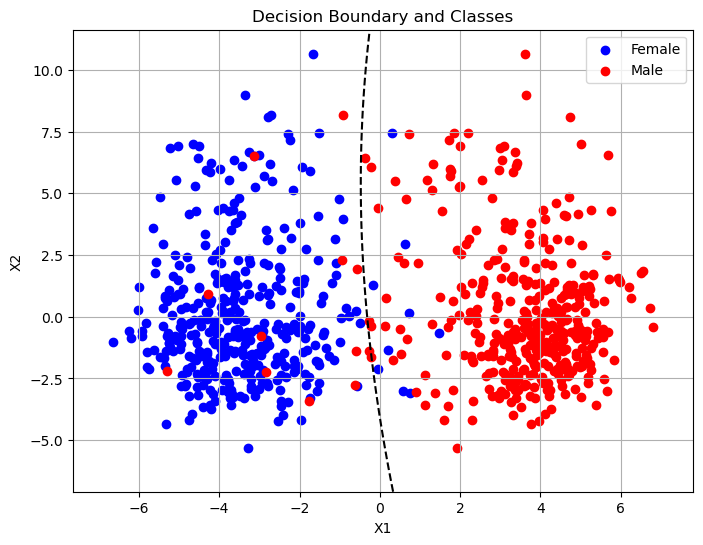

In [31]:
result = bayes_classifier(training_male_df, training_female_df, pw1, pw2)
x_min, x_max = min(np.min(training_male_df[:,0]), np.min(training_female_df[:,0])) - 1, max(np.max(training_male_df[:,0]), np.max(training_female_df[:,0])) + 1
y_min, y_max = min(np.min(training_male_df[:,1]), np.min(training_female_df[:,1])) - 1, max(np.max(training_female_df[:,1]), np.max(training_female_df[:,1])) + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Evaluate the decision boundary difference f1 - f2 at each grid point
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i, j] = result(np.array([xx[i, j], yy[i, j]]))

#print(zz)

# Plotting the contour of the difference between f1 and f2
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, zz, levels=[0], colors='k', linestyles='--')  # Decision boundary (f1 - f2 = 0)

# Plotting the points from w1 and w2
plt.scatter(training_male_df[:, 0], training_female_df[:, 1], color='blue', label='Female')
plt.scatter(training_female_df[:, 0], training_female_df[:, 1], color='red', label='Male')

# Plot details
plt.title('Decision Boundary and Classes')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

plt.show()